# Описание датасета

По заданию используется датасет Titanic, скачанный с ресурса Kaggle, ссылка на который представлена в списке используемой литературы [1]. Для начала необходимо проанализировать данный датасет. Датасет посвящён предсказанию выживания пассажиров на борту Титаника. \
В датасете представлены различные признаки, предполагаемо влияющие на выживаемость, такие как класс билета (Pclass), возраст пассажира (Age), количество братьев/сестер или супругов (SibSp), количество родителей детей (Parch), стоимость билета (Fare) – числовые признаки, имя пассажира (Name), пол пассажира (Sex), порт отправления пассажира (Embarked) – качественные признаки. \
Выделены признаки, которые не могут оказывать влияния на выживаемость пассажира. Уникальный идентификатор пассажира (PassengerId) не имеет значения, так как это просто порядковый номер, не связанный с шансами на выживание. Номер билета также не влияет на прогноз, так как в нем нет числового смысла, нет значимой разницы между билетом №1 и билетом №100. Номер каюты (Cabin) также, предположительно, не оказывает влияния на выживаемость, так как, аналогично номеру билета, нет значимой разницы между номерами кают. \
В результате анализа также была поставлена под сомнение важность таких признаков, как имя пассажира, количество сестер/братьев, супругов и количество родителей, детей, порт отправления пассажира. В имени пассажира ценность может представлять указанный титул пассажира, который можно выделить и использовать для прогноза, однако оказываемое влияние титула маловероятно. Количество родственников можно объединить под один признак и использовать для определения, одинок пассажир или нет, что в теории вполне может влиять на выживаемость. Влияние порта отправления на выживаемость также стоит под вопросом, так как на момент трагедии все пассажиры, отправившиеся в путешествие из разных портов, предположительно, имели одинаковые шансы на выживание.


# Импорт библиотек и загрузка датасета

Импорт библиотек, загрузка датасета.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Предобработка данных

Для вывода информации о данных используется метод .info().

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Датасет содержит 891 запись, 12 столбцов. В столбце Age есть пропущенные значения (177 пропущенных значений), что не является критически большим значением, можно заполнить пропущенные значения. В столбце Cabin также отсутствуют значения, однако в большом количестве (687 пропущенных значений из 891), что подтверждает идею, не использовать этот столбец для обучения. Столбец Embarked содержит 2 пропущенных, это незначительная доля данных, и можно заполнить пропущенные значения. Также с помощью метода .info() можно просмотреть типы данных в столбцах, типы верны. \
Далее используется функция .describe() для описания числовых признаков.

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Столбец PassengerID можно не учитывать в анализе, так как не несет никакой смысловой нагрузки в рамках задачи. Среднее значение столбца Survived равное 0,38 означает, что 38% пассажиров выжили, а 62% нет. Среднее значение столбца Pclass равное 2,31 говорит о том, что большинство пассажиров ехали в 3 классе. В столбце Age средний возраст 29,7 лет, минимальный возраст 0,42 года (ребенок), максимальный 80 лет. Средние значения столбцов SibSp и Parch равные 0,5 и 0,4 соответственно, говорит о том, что у большинства людей на корабле не было родственников. В столбце Fare средняя стоимость билета равна 32,2, минимальное значение равное 0 говорит о том, что возможно некоторые пассажиры путешествовали бесплатно, максимальная цена билета 512,33. \
Проверка датасета на наличие пропусков с помощью метода .isna() и функции .sum().

In [7]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Результаты соответствуют сделанным ранее в ходе анализа выводам. \
Далее идет поиск явных дубликатов в данных с помощью метода duplicated().

In [8]:
print(data.duplicated().sum())

0


Явные дубликаты не найдены. \
Поиск неявных дубликатов с помощью вывода уникальных значений некоторых столбцов, которые могут содержать неявные дубликаты (Sex и Embarked).


In [9]:
print(data['Sex'].unique())
print(data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


Из результата вывода уникальных значений по столбцам Sex и Embarked можно сказать, что неявных дубликатов нет. \
Далее заполнение пропущенных значений. В столбце Embarked всего 2 пропущенных значения, которые можно заменить на самое часто встречающееся значение. Для этого необходимо выявить его с помощью метода .mode().

In [10]:
data['Embarked'].mode()[0]

'S'

Самый часто встречающийся порт – порт «S». \
Замена пропущенного значения на самое часто встречающееся.

In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-11-4247733614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


Пропущенных значений в столбце Age – 177, данные значения можно заполнить средним значением столбца. \
Проверка на пропущенные значения.

In [12]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Пропусков в столбцах Embarked и Age не обнаружено. \
Так как по логике номер каюты сам по себе ничего не говорит о шансах выжить, а также этот столбец содержит 687 пропусков, то разумнее удалить этот столбец.

In [13]:
new_data = data.drop(columns=['Cabin'])

Далее строится матрица рассеивания для числовых столбцов с целью лучше понять и проанализировать датасет.

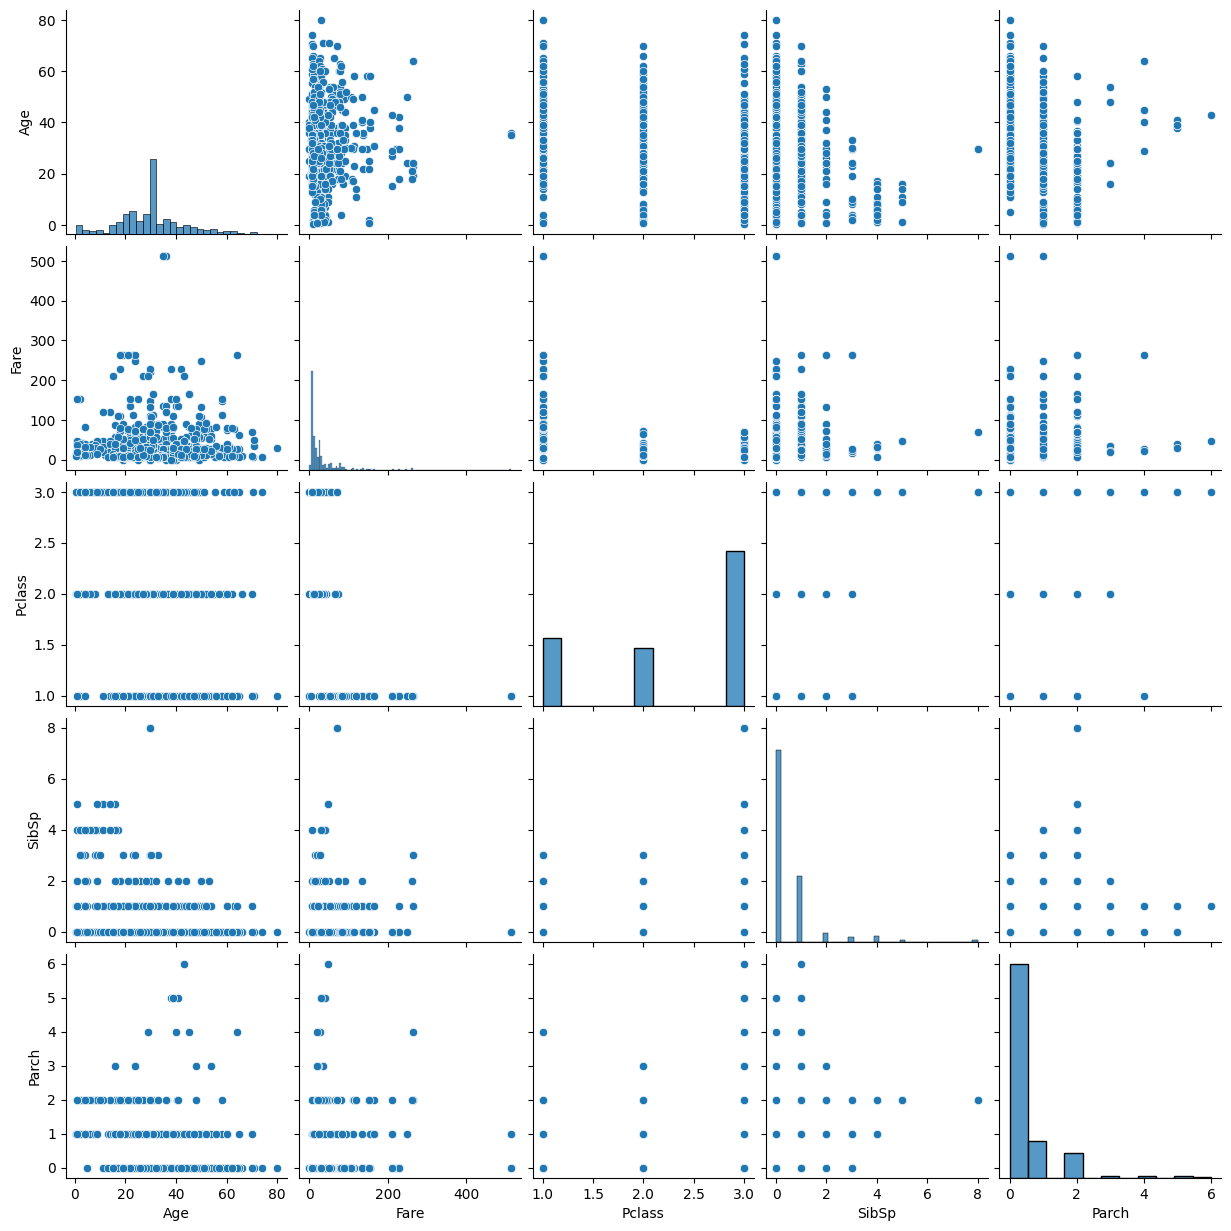

In [14]:
import seaborn as sns
sns.pairplot(new_data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']])
plt.show()

Из графика видно, что есть точки с ценами выше 500, что на первый взгляд кажется выбросом. Однако, если посмотреть зависимости цены билета от класса, то можно заметить, что дорогие билеты принадлежат только 1 классу, поэтому это не явный выброс, а скорее логичное значение. В целом видно, что в 1 классе билеты дорогие, а в 3 классе они гораздо дешевле. \
Видно несколько точек с очень высокими значениями SibSp и Parch (8 и 6 соответственно). Такие большие семьи на борту могли существовать, если посмотреть на ячейку Age и Parch можно заметить, что 6 детей/родителей было у пассажира в возрасте 40 лет, что вполне разумно, такой пассажир мог взять с собой в путешествие и детей и родителей, например. \
Нет явной связи между ценой билета и возрастом пассажира, дорогие билеты брали люди разного возраста. \
Далее строится тепловая карта, чтобы лучше оценить зависимости между данными.


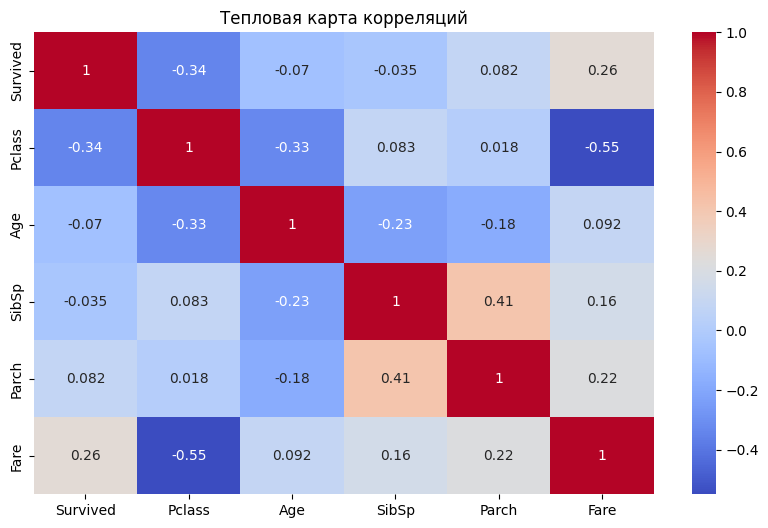

In [15]:
corr_matrix = new_data.drop(columns=['PassengerId']).select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляций")
plt.show()

Коэффициент корреляции между Survived и Pclass равный -0,34 говорит об слабой отрицательной корреляции, чем выше класс (1 класс), тем незначительно больше вероятность выживания.
Age почти не влияет на выживание, так как коэффициент корреляции между Survived  и Age равен -0,07, то есть практически нет связи.
Коэффициент корреляции между Survived  и Fare равный 0,26 говорит об слабой положительной корреляции, то есть дорогие билеты немного увеличивали шанс на выживание.
Незначительная отрицательная корреляция (-0,035) также выявлена между выживаемостью и наличием братьев/сестер/супругов на борту.
Также незначительная положительная корреляция (0,085) между выживаемостью и наличием детей/родителей на борту. \
Далее необходимо немного откорректировать данные в датасете, а именно, объединить столбцы с указанием количества родственников в один, для лучшей наглядности, исходя из данных этого столбца выделить столбец IsAlone, который будет отражать информацию один путешествовал пассажир или нет. Столбцы SibSp и Parch удаляются впоследствии.


In [16]:
new_data['Family'] = new_data['SibSp'] + new_data['Parch']
new_data2 = new_data.drop(columns=['SibSp', 'Parch'])
new_data2["IsAlone"] = (new_data2["Family"] == 0).astype(int)
new_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,0,1


Столбец Family также можно удалить.

In [17]:
new_data2 = new_data2.drop(columns=['Family'])
new_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,1


Из столбца Name вычленяются титулы, так как, возможно, люди с более высоким статусом имели большие шансы на спасение, а также такое вычленение титулов позволит избавиться от бесполезного в предсказании столбца Name, оставив долю полезной информации. Столбец Name в последствии удаляется.

In [18]:
new_data2['Title'] = new_data2['Name'].str.extract(r' ([A-Za-z]+)\.')
new_data2 = new_data2.drop(columns=['Name'])
new_data2

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,IsAlone,Title
0,1,0,3,male,22.000000,A/5 21171,7.2500,S,0,Mr
1,2,1,1,female,38.000000,PC 17599,71.2833,C,0,Mrs
2,3,1,3,female,26.000000,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,female,35.000000,113803,53.1000,S,0,Mrs
4,5,0,3,male,35.000000,373450,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,211536,13.0000,S,1,Rev
887,888,1,1,female,19.000000,112053,30.0000,S,1,Miss
888,889,0,3,female,29.699118,W./C. 6607,23.4500,S,0,Miss
889,890,1,1,male,26.000000,111369,30.0000,C,1,Mr


Выводится список с подсчетом уникальных значений столбца Title.

In [19]:
print(new_data2["Title"].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


Наименований титулов много, однако у большинства из них количество небольшое, их можно заменить одним наименованием титула – rare (редкие). Также необходимо заменить французские варианты титулов на английские.

In [20]:
rare_titles = ["Capt", "Col", "Don", "Dr", "Major", "Rev", "Jonkheer", "Dona", "Lady", "Countess", "Sir"]
new_data2["Title"] = new_data2["Title"].replace(rare_titles, "Rare")
new_data2["Title"] = new_data2["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})
print(new_data2["Title"].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


Таким образом, титулов для взрослых мужчин (Mr) – 517. Титулов для незамужних женщин или девочек (Miss) – 185. Титулов для замужних женщин (Mrs) – 126. Титулов для мальчиков (Master) – 40. И редких титулов – 23. \
Перед преобразованием признаков удаляются столбцы Ticket и PassengerID, так как эти столбцы не несут никакой смысловой нагрузки для обучения и предсказания.

In [21]:
new_data2 = new_data2.drop(columns=['PassengerId', 'Ticket'])
new_data2

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,male,22.000000,7.2500,S,0,Mr
1,1,1,female,38.000000,71.2833,C,0,Mrs
2,1,3,female,26.000000,7.9250,S,1,Miss
3,1,1,female,35.000000,53.1000,S,0,Mrs
4,0,3,male,35.000000,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,1,Rare
887,1,1,female,19.000000,30.0000,S,1,Miss
888,0,3,female,29.699118,23.4500,S,0,Miss
889,1,1,male,26.000000,30.0000,C,1,Mr


Определяются признаки и целевая переменная.

In [22]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone', 'Title']
target = 'Survived'

Данные разбиваются на X (признаки) и y (целевая переменная).

In [23]:
X = new_data2[features]
y = new_data2[target]

Деление данных на тренировочную и тестовую выборки с помощью train_test_split.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Нормализация числовых переменных с помощью StandardScaler() и кодирование категориальных переменных с помощью OneHotEncoder().

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Age', 'Fare', 'IsAlone']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Обучение модели

Создается модель нейросети.


In [26]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Компиляция модели, задаются параметры обучения, а именно оптимизатор – adam (адаптивный метод градиентного спуска), функция потерь – binary_crossentropy (потому что это бинарная классификация), метрика – accuracy (точность предсказаний).

In [27]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Обучение модели. Чтобы модель проходила по данным 50 раз задаются epochs равные 50. Задается размер батчей batch_size равный 16, чтобы каждые 16 примеров обрабатывались за один шаг градиентного спуска. Задается проверка на тестовой выборке после каждой эпохи. Модель будет учиться на X_train, корректируя веса, и проверять качество на X_test. В переменную history сохраняется история обучения.

In [28]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6815 - loss: 0.6623 - val_accuracy: 0.6927 - val_loss: 0.6420
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7699 - loss: 0.6101 - val_accuracy: 0.7207 - val_loss: 0.5886
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7575 - loss: 0.5645 - val_accuracy: 0.7318 - val_loss: 0.5389
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8081 - loss: 0.4941 - val_accuracy: 0.7263 - val_loss: 0.5101
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7972 - loss: 0.4635 - val_accuracy: 0.7486 - val_loss: 0.4963
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7777 - loss: 0.4723 - val_accuracy: 0.7542 - val_loss: 0.4880
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7982 - loss: 0.4457 - val_accuracy: 0.7542 - val_loss: 0.4817
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7804 - loss: 0.4438 - val_accuracy: 0.7989 - val_loss

После обучения модель тестируется на X_test, и выводится её точность.

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8231 - loss: 0.4556
Accuracy: 0.7988826632499695


Модель предсказывает правильный результат примерно в 80% случаев на тестовой выборке. Потери (loss = 0,4322) показывают, насколько модель ошибается в предсказаниях. Чем меньше потери, тем лучше.

# Графики

История обучения модели сохранялась в переменную history. Далее необходимо получить данные из истории.

In [30]:
epochs = range(1, len(history.history['accuracy']) + 1)

Строятся два графика. Первый график должен показывать изменение точности модели на обучающей и тестовой выборке. Второй график показывать, как изменяется функция потерь.

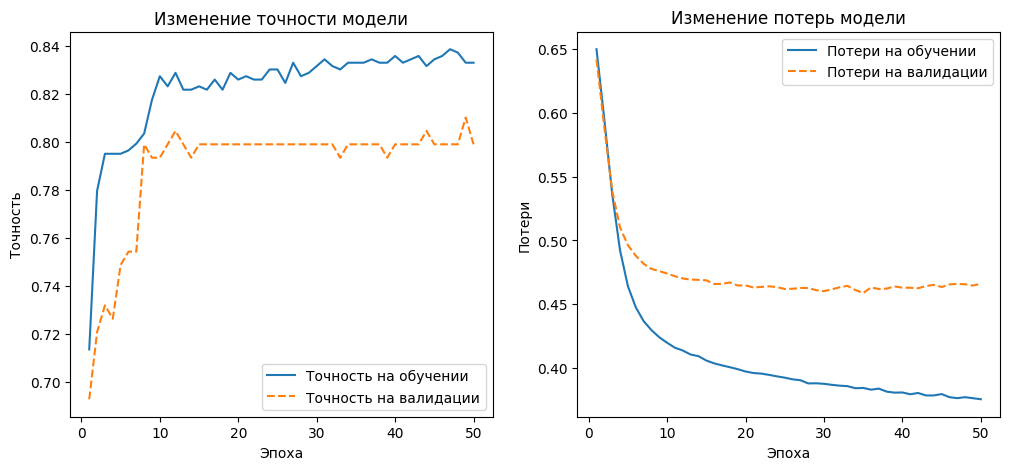

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Точность на обучении')
plt.plot(epochs, history.history['val_accuracy'], label='Точность на валидации', linestyle='dashed')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title('Изменение точности модели')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Потери на обучении')
plt.plot(epochs, history.history['val_loss'], label='Потери на валидации', linestyle='dashed')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('Изменение потерь модели')
plt.legend()

plt.show()

Точность на обучающей выборке остаётся стабильной примерно 83% и колеблется в небольших пределах. Точность на валидации ниже и ведёт себя нестабильно, видны значительные колебания. Разрыв между графиками может говорить о переобучении, что модель хорошо запомнила обучающие данные, но хуже обобщает на новые. \
Потери на обучении уменьшаются, что может означать, что модель продолжает учиться. Потери на валидации держутся стабильно.
